### Problem Statement
Build a model thatpredicts an accurate delivery time, from picking up a package arriving at the final
destination. An accurate arrival time prediction will help all business to improve their
logistics and communicate the accurate time their time to their customers. You will be
required to perform various feature engineering techniques while preparing your data for
further analysis.

### Data Analysis Question
help predict the estimated time of delivery of orders, from the
point of driver pickup to the point of arrival at the final destination

### Measure of Success
predicts an accurate delivery time.

In [24]:
#Import libraries
import pandas as pd               # pandas for performing data manipulation
import numpy as np                # numpy for performing scientific computations
import matplotlib.pyplot as plt   # matplotlib for performing visualisation 
import seaborn as sns

### Data Importation

In [18]:
#read the data and explore the first 5 lines
sendy_df = pd.read_csv('https://bit.ly/3deaKEM')


### Data exploration

In [ ]:
# reading the first 5 entries
sendy_df.head()

In [4]:
# describe the data
sendy_df.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [5]:
#check the data sise
sendy_df.shape

(21201, 29)

In [6]:
# checking the data types
sendy_df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

### Data cleaning

In [19]:
# # convert all column headers to lower case

sendy_df.columns =  sendy_df.columns.str.lower()
sendy_df.columns

Index(['order no', 'user id', 'vehicle type', 'platform type',
       'personal or business', 'placement - day of month',
       'placement - weekday (mo = 1)', 'placement - time',
       'confirmation - day of month', 'confirmation - weekday (mo = 1)',
       'confirmation - time', 'arrival at pickup - day of month',
       'arrival at pickup - weekday (mo = 1)', 'arrival at pickup - time',
       'pickup - day of month', 'pickup - weekday (mo = 1)', 'pickup - time',
       'arrival at destination - day of month',
       'arrival at destination - weekday (mo = 1)',
       'arrival at destination - time', 'distance (km)', 'temperature',
       'precipitation in millimeters', 'pickup lat', 'pickup long',
       'destination lat', 'destination long', 'rider id',
       'time from pickup to arrival'],
      dtype='object')

In [20]:
#checking the missing data
sendy_df.isnull().sum()


order no                                         0
user id                                          0
vehicle type                                     0
platform type                                    0
personal or business                             0
placement - day of month                         0
placement - weekday (mo = 1)                     0
placement - time                                 0
confirmation - day of month                      0
confirmation - weekday (mo = 1)                  0
confirmation - time                              0
arrival at pickup - day of month                 0
arrival at pickup - weekday (mo = 1)             0
arrival at pickup - time                         0
pickup - day of month                            0
pickup - weekday (mo = 1)                        0
pickup - time                                    0
arrival at destination - day of month            0
arrival at destination - weekday (mo = 1)        0
arrival at destination - time  

### Observation
temperature and Precipitation has missing data.
for standardization, we shall replace these with mean values.

In [21]:
# replacing the temperature and precipitation data with mean value

sendy_df['temperature'].fillna(value=sendy_df['temperature'].mean(), inplace=True)
sendy_df['precipitation in millimeters'].fillna(value=sendy_df['precipitation in millimeters'].mean(), inplace=True)

sendy_df.isnull().sum()

order no                                     0
user id                                      0
vehicle type                                 0
platform type                                0
personal or business                         0
placement - day of month                     0
placement - weekday (mo = 1)                 0
placement - time                             0
confirmation - day of month                  0
confirmation - weekday (mo = 1)              0
confirmation - time                          0
arrival at pickup - day of month             0
arrival at pickup - weekday (mo = 1)         0
arrival at pickup - time                     0
pickup - day of month                        0
pickup - weekday (mo = 1)                    0
pickup - time                                0
arrival at destination - day of month        0
arrival at destination - weekday (mo = 1)    0
arrival at destination - time                0
distance (km)                                0
temperature  

### Outliers 

In [36]:
#we shall use the quantiles to define and calculate our outliers
# defining our quantiles using the quantile() function
Q1 = sendy_df.quantile(0.25)
Q3 = sendy_df.quantile(0.75)
IQR = Q3-Q1
#filtering out our outliers by getting values which are outside our IQR Range.

sendy_df_iqr = sendy_df[((sendy_df < (Q1 - 1.5 * IQR)) | (sendy_df > (Q3 + 1.5 * IQR))).any(axis=1)]
# Checking the size of the dataset with outliers for cleaning purposes
sendy_df_iqr.shape

C:\Users\jkaruria\AppData\Local\Temp\ipykernel_13288\1775121198.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = sendy_df.quantile(0.25)
C:\Users\jkaruria\AppData\Local\Temp\ipykernel_13288\1775121198.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = sendy_df.quantile(0.75)
C:\Users\jkaruria\AppData\Local\Temp\ipykernel_13288\1775121198.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  sendy_df_iqr = sendy_df[((sendy_df < (Q1 - 1.5 * IQR)) | (sendy_df 

(6831, 29)

Since this data may affect our output significantly, we shall drop them

In [37]:
# dropping the outliers

clean_sendy_df = sendy_df[~((sendy_df < (Q1 - 1.5 * IQR)) | (sendy_df > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_sendy_df.shape

C:\Users\jkaruria\AppData\Local\Temp\ipykernel_13288\2807484924.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  clean_sendy_df = sendy_df[~((sendy_df < (Q1 - 1.5 * IQR)) | (sendy_df > (Q3 + 1.5 * IQR))).any(axis=1)]


(14370, 29)

### Data Modeling


In [41]:
clean_sendy_df.head()

,order no,user id,vehicle type,platform type,personal or business,placement - day of month,placement - weekday (mo = 1),placement - time,confirmation - day of month,confirmation - weekday (mo = 1),...,arrival at destination - time,distance (km),temperature,precipitation in millimeters,pickup lat,pickup long,destination lat,destination long,rider id,time from pickup to arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.400000,7.905797,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,23.258889,7.905797,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.200000,7.905797,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
5,Order_No_7408,User_Id_1342,Bike,3,Business,14,5,3:07:35 PM,14,5,...,4:23:41 PM,9,27.200000,7.905797,-1.302583,36.767081,-1.257309,36.806008,Rider_Id_124,3191
6,Order_No_22680,User_Id_2803,Bike,3,Business,9,5,9:33:45 AM,9,5,...,10:19:45 AM,5,20.300000,7.905797,-1.279395,36.825364,-1.276574,36.851365,Rider_Id_114,1380


In [42]:
clean_sendy_df['vehicle type'].unique()

array(['Bike'], dtype=object)

## Haverine formulae

In [45]:
from haversine import haversine, Unit

start = (-1.317755, 36.830370) # (lat, lon)
destination = (-1.300406, 36.829741)

speed = haversine(start, destination)/3
speed

0.6434634205769111

In [47]:
#creating new column for speed in km/hr
clean_sendy_df['speed'] = (clean_sendy_df['distance (km)'])/((clean_sendy_df['time from pickup to arrival'])/3600)

clean_sendy_df.head()

C:\Users\jkaruria\AppData\Local\Temp\ipykernel_13288\4052300531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_sendy_df['speed'] = (clean_sendy_df['distance (km)'])/((clean_sendy_df['time from pickup to arrival'])/3600)


,order no,user id,vehicle type,platform type,personal or business,placement - day of month,placement - weekday (mo = 1),placement - time,confirmation - day of month,confirmation - weekday (mo = 1),...,distance (km),temperature,precipitation in millimeters,pickup lat,pickup long,destination lat,destination long,rider id,time from pickup to arrival,speed
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,4,20.400000,7.905797,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,19.328859
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,3,23.258889,7.905797,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,23.736264
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,9,19.200000,7.905797,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,24.161074
5,Order_No_7408,User_Id_1342,Bike,3,Business,14,5,3:07:35 PM,14,5,...,9,27.200000,7.905797,-1.302583,36.767081,-1.257309,36.806008,Rider_Id_124,3191,10.153557
6,Order_No_22680,User_Id_2803,Bike,3,Business,9,5,9:33:45 AM,9,5,...,5,20.300000,7.905797,-1.279395,36.825364,-1.276574,36.851365,Rider_Id_114,1380,13.043478


In [55]:
# First we check for modeling without without normalisation and standardisation

# ---

# We select our features
features = clean_sendy_df[['confirmation - day of month', 'confirmation - weekday (mo = 1)', 'distance (km)', 'temperature', 'precipitation in millimeters','speed']]
target = clean_sendy_df['time from pickup to arrival']


# Splitting our dataset 
# ---
# NB: We use random_state to get the same results everytime,
# else we'd get to be working with different test and train datasets.
# ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state = 42) 

# Fitting in our models 
# ---
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 

# Don't worry about the model parameters, we will learn about 
# them in a separate workshop
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = RandomForestRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Random forest RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 716.8789515864476
KNN RMSE: 155.78483198351125
Decision Tree RMSE: 29.176340378063966


In [58]:
# We then check for modeling with only normalisation
# ---

# We select our features
features = clean_sendy_df[['confirmation - day of month', 'confirmation - weekday (mo = 1)', 'distance (km)', 'temperature', 'precipitation in millimeters','speed']]
target = clean_sendy_df['time from pickup to arrival']


# Splitting our dataset 
# ---
# NB: We use random_state to get the same results everytime,
# else we'd get to be working with different test and train datasets.
# ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state = 42) 

# Performing normalisation 
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Fitting in our models  
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = RandomForestRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Random Forest RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 654.1519110930833
KNN RMSE: 647.2111886322664
Random Forest RMSE: 28.683127330516008


In [57]:
# First we check for modeling with standardisation
# ---


# We select our features
features = clean_sendy_df[['confirmation - day of month', 'confirmation - weekday (mo = 1)', 'distance (km)', 'temperature', 'precipitation in millimeters','speed']]
target = clean_sendy_df['time from pickup to arrival']


# Splitting our dataset 
# ---
# NB: We use random_state to get the same results everytime,
# else we'd get to be working with different test and train datasets.
# ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state = 42) 

# Performing standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Fitting in our models  
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = RandomForestRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Random Forest RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 632.5439424448925
KNN RMSE: 639.6823591464035
Random Forest RMSE: 485.80852522606506


### Pearson's Correlation Coefficient

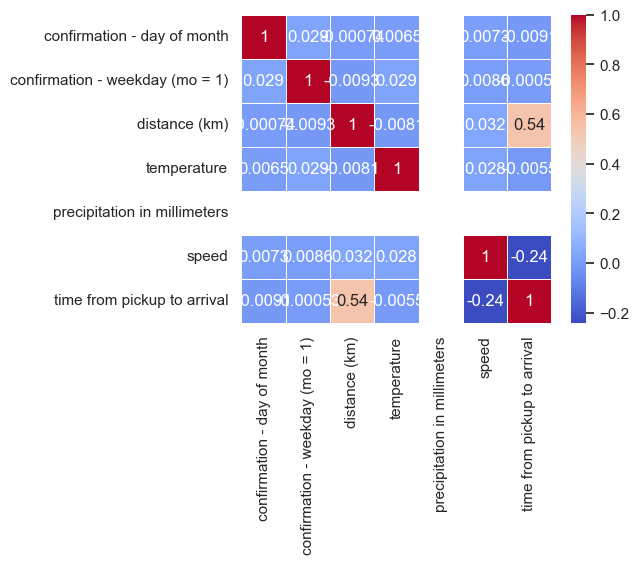

In [60]:
# we create a new data frame to check the correlation with
arrival_df = clean_sendy_df[['confirmation - day of month', 'confirmation - weekday (mo = 1)', 'distance (km)', 'temperature', 'precipitation in millimeters','speed', 'time from pickup to arrival']]


# Then appply filter methods by plotting a correlation matrix
# ---
#
sendy_corr = arrival_df.corr()
plt.figure(figsize=(5,4))

# We then plot our heatmap visualistion
# 

sns.heatmap(sendy_corr, annot=True, linewidth=0.5, cmap='coolwarm');

From above, all the data in the data set has a relation. This implies that data set used previously applies

## Filtering Methods


### Step Forward Feature Selection

In [61]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

# installing mlrose
!pip install mlrose
import mlrose

# importing joblib
import joblib
sys.modules['sklearn.externals.joblib'] = joblib


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
 #First, we then perform modeling with both standardisation and normalisation.
# We select our features
features = clean_sendy_df[['confirmation - day of month', 'confirmation - weekday (mo = 1)', 'distance (km)', 'temperature', 'precipitation in millimeters','speed']]
target = clean_sendy_df['time from pickup to arrival']


# Splitting our dataset 
# ---
# NB: We use random_state to get the same results everytime,
# else we'd get to be working with different test and train datasets.
# ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state = 42) 

# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Selecting the ML algorithm to use   
dec_regressor = RandomForestRegressor(random_state=27)

# We pass the svm_regressor the estimator to the SequentialFeatureSelector function. 
# The k_features specifies the number of features to select. 
# We can set any number of features here. The forward parameter, if set to True, 
# performs step forward feature selection. The verbose parameter is used for logging 
# the progress of the feature selector, the scoring parameter defines the performance 
# evaluation criteria and finally, cv refers to cross-validation folds.
# ---
# Hint: Hover cursor on SequentialFeatureSelector to get a list of more parameter values.
# ---
#
from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(dec_regressor,
           k_features=4,
           forward=True,
           verbose=2,
           scoring='r2',
           cv=4)
 
# Perform step forward feature selection
feature_selector = feature_selector.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.8s finished

[2022-11-20 11:07:55] Features: 1/4 -- score: 0.3083107378606025[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.5s finished

[2022-11-20 11:08:03] Features: 2/4 -- score: 0.9989158596259933[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   17.0s finished

[2022-11-20 11:08:20] Features: 3/4 -- score: 0.9989362765103049[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [63]:
# Which are the selected features?
# The columns at these indexes are those which were selected
# ---
#
feat_cols = list(feature_selector.k_feature_idx_)
print(feat_cols)

[1, 2, 4, 5]


In [66]:
# We can now use those features to build our model
# ---
# 

# Without step forward feature selection (sffs)
dec_regressor = RandomForestRegressor(random_state=27)
dec_regressor.fit(X_train, y_train)

# With step forward feature selection
dec_regressor2 = RandomForestRegressor(random_state=27)
dec_regressor2.fit(X_train[:, feat_cols], y_train)

# Making Predictions and determining the accuracies
y_test_pred = dec_regressor.predict(X_test)
print('Random forest RMSE Without sffs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

y_test_pred2 = dec_regressor2.predict(X_test[:, feat_cols])
print('Random forest RMSE with sffs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2)))

Random forest RMSE Without sffs: 28.683127330516008
Random forest RMSE with sffs: 19.341466512982695


### Step Backward Feature Selection

In [67]:
 #First, we then perform modeling with both standardisation and normalisation.
# We select our features
features = clean_sendy_df[['confirmation - day of month', 'confirmation - weekday (mo = 1)', 'distance (km)', 'temperature', 'precipitation in millimeters','speed']]
target = clean_sendy_df['time from pickup to arrival']


# Splitting our dataset 
# ---
# NB: We use random_state to get the same results everytime,
# else we'd get to be working with different test and train datasets.
# ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state = 42) 

# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Selecting the ML algorithm to use   
dec_regressor = RandomForestRegressor(random_state=27)
# We pass the dec_regressor the estimator to the SequentialFeatureSelector function. 

from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(dec_regressor,
           k_features=4,
           forward=False,
           verbose=2,
           scoring='r2',
           cv=4)
 
# Perform step backward feature selection
feature_selector = feature_selector.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   32.2s finished

[2022-11-20 11:41:58] Features: 5/4 -- score: 0.9983954343992464[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.4s finished

[2022-11-20 11:42:20] Features: 4/4 -- score: 0.998659985030952

In [68]:

# Which are the selected features?
# The columns at these indexes are those which were selected
# ---
#
feat_cols = list(feature_selector.k_feature_idx_)
print(feat_cols)

[1, 2, 4, 5]


In [69]:
# We can now use those features to build a full model
# ---
# 

# Without step backward feature selection (sbfs)
dec_regressor = RandomForestRegressor(random_state=27)
dec_regressor.fit(X_train, y_train)

# With step backward feature selection
dec_regressor2 = RandomForestRegressor(random_state=27)
dec_regressor2.fit(X_train[:, feat_cols], y_train)

# Making Predictions and determining the accuracies  
y_test_pred = dec_regressor.predict(X_test)
print('RandomForestRegressor Without sbfs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

y_test_pred2 = dec_regressor2.predict(X_test[:, feat_cols])
print('RandomForestRegressor RMSE with sbfs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2)))

Decision Tree RMSE Without sbfs: 28.683127330516008
Decision Tree RMSE with sbfs: 19.341466512982695


### Recursive Feature Elimination (RFE)

In [ ]:
# The Recursive Feature Elimination (RFE) method is a feature selection approach which 
# works by recursively removing attributes and building a model on those attributes that remain. 
# It uses the model accuracy to identify which attributes (and combination of attributes) 
# contribute the most to predicting the target attribute.
# ---
# Dataset url = http://bit.ly/FishDatasetClean

In [73]:

# We select our features
features = clean_sendy_df[['confirmation - day of month', 'confirmation - weekday (mo = 1)', 'distance (km)', 'temperature', 'precipitation in millimeters','speed']]
target = clean_sendy_df['time from pickup to arrival']


# Splitting our dataset 
# ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state = 42) 
# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Fitting in our models   

svm_regressor = SVR(kernel="linear")   
dec_regressor = RandomForestRegressor(random_state=27)

# We want to select the best 2 features for our model. 
# NB: n_features_to_select will include the response variable
# ---
#  
from sklearn.feature_selection import RFE
svm_regressor = RFE(svm_regressor, n_features_to_select = 3, step=1)
dec_regressor = RFE(dec_regressor, n_features_to_select = 3, step=1)

svm_regressor.fit(X_train, y_train) 
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test) 
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model  
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred))) 
print('RandomForestRegressor RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))
 
# Displaying our best features
print('SVM Selected features: %s' % list(features.columns[svm_regressor.support_]))
print('RandomForestRegressor Selected features: %s' % list(features.columns[dec_regressor.support_]))

SVM RMSE: 713.728412659433
RandomForestRegressor RMSE: 23.34999331945418
SVM Selected features: ['distance (km)', 'temperature', 'speed']
RandomForestRegressor Selected features: ['distance (km)', 'temperature', 'speed']


## Transformation


### PCA

In [75]:
# using the principal component analysis (PCA) to reduce our features into components.

# We select our features
features = clean_sendy_df[['confirmation - day of month', 'confirmation - weekday (mo = 1)', 'distance (km)', 'temperature', 'precipitation in millimeters','speed']]
target = clean_sendy_df['time from pickup to arrival']


# Splitting our dataset 
# ---
# NB: We use random_state to get the same results everytime,
# else we'd get to be working with different test and train datasets.
# ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state = 42) 

# Performing normalisation 
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)
# Applying PCA

# 
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Fitting in our models  
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = RandomForestRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Random Forest RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 656.6961429728736
KNN RMSE: 647.2111886322664
Random Forest RMSE: 349.82339683378325


### LDA

In [79]:
#import LDA module

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Splitting our dataset 
# ---
# NB: We use random_state to get the same results everytime,
# else we'd get to be working with different test and train datasets.
# ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state = 42) 

# Performing normalisation 
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

#Applying LDA.

lda = LinearDiscriminantAnalysis()
X_train = lda.fit(X_train, y_train).transform(X_train)
X_test = lda.fit(X_test, y_test).transform(X_test)


# Fitting in our models  
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = RandomForestRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Random Forest RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 655.357287476408
KNN RMSE: 672.8858135380584
Random Forest RMSE: 1040.7206089822253
